In [2]:
import pandas as pd
stats=pd.read_csv("player_mvp_stats.csv")

In [3]:
stats.isna().any().any()

np.False_

In [4]:
stats.isna().sum()

Unnamed: 0    0
Player        0
Age           0
Team          0
Pos           0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
is_mvp        0
dtype: int64

In [5]:
del stats["Unnamed: 0"]


In [6]:
stats


,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS,is_mvp
0,Doc Rivers,29.0,Atlanta Hawks,PG,79.0,79.0,32.7,5.6,12.9,0.435,...,0.0,0.00,43.0,39.0,0.524,18.0,109.8,109.0,0.72,0
1,Dominique Wilkins,31.0,Atlanta Hawks,SF,81.0,81.0,38.0,9.5,20.2,0.470,...,960.0,0.03,43.0,39.0,0.524,18.0,109.8,109.0,0.72,0
2,Duane Ferrell,25.0,Atlanta Hawks,SF,78.0,2.0,14.9,2.2,4.6,0.489,...,0.0,0.00,43.0,39.0,0.524,18.0,109.8,109.0,0.72,0
3,Gary Leonard,23.0,Atlanta Hawks,C,4.0,0.0,2.3,0.0,0.0,0.000,...,0.0,0.00,43.0,39.0,0.524,18.0,109.8,109.0,0.72,0
4,John Battle,28.0,Atlanta Hawks,SG,79.0,2.0,23.6,5.0,10.9,0.461,...,0.0,0.00,43.0,39.0,0.524,18.0,109.8,109.0,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16244,Kyshawn George,21.0,Washington Wizards,SG,68.0,38.0,26.5,3.0,8.0,0.372,...,0.0,0.00,18.0,64.0,0.220,23.0,108.0,120.4,-12.14,0
16245,Malcolm Brogdon,32.0,Washington Wizards,PG,24.0,13.0,23.5,4.3,10.0,0.433,...,0.0,0.00,18.0,64.0,0.220,23.0,108.0,120.4,-12.14,0
16246,Marcus Smart,30.0,Washington Wizards,PG,34.0,7.0,20.0,3.0,7.6,0.393,...,0.0,0.00,18.0,64.0,0.220,23.0,108.0,120.4,-12.14,0
16247,Richaun Holmes,31.0,Washington Wizards,PF,31.0,7.0,17.2,2.9,4.5,0.647,...,0.0,0.00,18.0,64.0,0.220,23.0,108.0,120.4,-12.14,0


In [7]:
# Step 1: Data Preparation (Cleaning & sanity checks)
# Run this in the same folder as player_mvp_stats.csv (or change input_path).

import pandas as pd
import numpy as np
from pathlib import Path

# ---------- configure paths ----------
input_path = Path("player_mvp_stats.csv")          # change if needed
output_path = Path("player_mvp_stats_cleaned.csv") # cleaned output

# ---------- load ----------
df = pd.read_csv(input_path)
print(">>> Initial shape:", df.shape)
print(">>> First 6 columns (for quick check):", df.columns.tolist()[:6])

# ---------- drop index-like Unnamed columns if present ----------
unnamed_cols = [c for c in df.columns if c.startswith("Unnamed")]
if unnamed_cols:
    print("Dropping columns:", unnamed_cols)
    df = df.drop(columns=unnamed_cols)

# ---------- basic string cleaning ----------
for c in ["Player", "Team", "Pos"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

# ---------- coerce numeric-looking columns to numeric ----------
# We'll try to convert every column except Player/Team/Pos to numeric (coerce errors -> NaN)
non_numeric = {"Player", "Team", "Pos"}
cols_to_try = [c for c in df.columns if c not in non_numeric]
for c in cols_to_try:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- quick dtype and missing report ----------
print("\n>>> dtypes (sample):")
print(df.dtypes.head(20))

total_rows = len(df)
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_pct = 100 * missing_counts / total_rows
missing_report = pd.concat([missing_counts, missing_pct], axis=1)
missing_report.columns = ["missing_count", "missing_percent"]
print("\n>>> Columns with missing values (top 30):")
print(missing_report[missing_report["missing_count"]>0].head(30))

# ---------- sanity checks ----------
if "Year" in df.columns:
    print("\n>>> Year range:", int(df["Year"].min()), "to", int(df["Year"].max()))
if "Team" in df.columns:
    print(">>> Unique teams:", df["Team"].nunique())
if "Pos" in df.columns:
    print(">>> Position unique values:", df["Pos"].unique()[:20])
if "is_mvp" in df.columns:
    print(">>> is_mvp counts:\n", df["is_mvp"].value_counts(dropna=False))

# ---------- duplicates check ----------
if set(["Player","Year"]).issubset(df.columns):
    dup_mask = df.duplicated(subset=["Player","Year","Team"], keep=False)
    print(">>> Duplicate rows by Player-Year-Team:", dup_mask.sum())

# ---------- helpful heuristic: recompute some percentages if possible ----------
# Example: if FG% missing but FG and FGA exist -> recompute FG% = FG / FGA
if set(["FG", "FGA", "FG%"]).issubset(df.columns):
    recomputable = (~df["FG"].isnull()) & (~df["FGA"].isnull()) & (df["FGA"]!=0)
    missing_fg_pct = df["FG%"].isnull()
    fill_mask = recomputable & missing_fg_pct
    df.loc[fill_mask, "FG%"] = df.loc[fill_mask, "FG"] / df.loc[fill_mask, "FGA"]
    print(f">>> Filled {fill_mask.sum()} FG% values from FG/FGA where possible.")

# ---------- simple imputation strategy (safe, reproducible) ----------
# - numeric columns -> fill with median
# - categorical columns -> fill with mode
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print(f"\n>>> Numeric cols detected: {len(num_cols)}")
print(f">>> Categorical cols detected: {cat_cols}")

# Save a copy of the missing-report BEFORE imputation for your inspection
missing_before_impute = missing_report.copy()

# Impute numerics with median
for c in num_cols:
    if df[c].isnull().any():
        median_val = df[c].median()
        df[c] = df[c].fillna(median_val)

# Impute categoricals with mode
for c in cat_cols:
    if df[c].isnull().any():
        modes = df[c].mode()
        fill_val = modes[0] if len(modes)>0 else "Unknown"
        df[c] = df[c].fillna(fill_val)

# ---------- post-imputation check ----------
missing_after = df.isnull().sum().sort_values(ascending=False)
print("\n>>> Missing counts after imputation (top 30):")
print(missing_after[missing_after>0].head(30))

# ---------- type-cast is_mvp to int 0/1 ----------
if "is_mvp" in df.columns:
    df["is_mvp"] = df["is_mvp"].astype(int)

# ---------- save cleaned csv ----------
df.to_csv(output_path, index=False)
print("\n>>> Cleaned CSV saved to:", output_path)
print(">>> Cleaned shape:", df.shape)

# ---------- show sample rows ----------
print("\n>>> Sample head (first 5 rows):")
print(df.head(5).to_string())


>>> Initial shape: (16249, 42)
>>> First 6 columns (for quick check): ['Unnamed: 0', 'Player', 'Age', 'Team', 'Pos', 'G']
Dropping columns: ['Unnamed: 0']

>>> dtypes (sample):
Player     object
Age       float64
Team       object
Pos        object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
dtype: object

>>> Columns with missing values (top 30):
Empty DataFrame
Columns: [missing_count, missing_percent]
Index: []

>>> Year range: 1991 to 2025
>>> Unique teams: 37
>>> Position unique values: ['PG' 'SF' 'C' 'SG' 'PF']
>>> is_mvp counts:
 is_mvp
0    16214
1       35
Name: count, dtype: int64
>>> Duplicate rows by Player-Year-Team: 0
>>> Filled 0 FG% values from FG/FGA where possible.

>>> Numeric cols detected: 38
>>> Categorical cols detected: ['

>>> Loaded shape: (16249, 41)
>>> Feature count: 40
>>> Target unique values: [0 1]

>>> Train shape: (15684, 41)
>>> Test shape: (565, 41)

>>> X_train shape: (15684, 38)
>>> y_train shape: (15684,)
>>> X_test shape: (565, 38)
>>> y_test shape: (565,)

>>> Training data MVP counts:
is_mvp
0    15650
1       34
Name: count, dtype: int64

>>> Test data MVP counts:
is_mvp
0    564
1      1
Name: count, dtype: int64

>>> Unique years in training: [1991 1992 1993 1994 1995]
>>> Unique years in test: [2025]

>>> Top 10 features most correlated with MVP status:
is_mvp     1.000000
Share      0.724950
Pts Won    0.718132
Pts Max    0.256768
FT         0.171460
FTA        0.166999
PTS        0.147817
2P         0.143039
FG         0.140298
2PA        0.130154
Name: is_mvp, dtype: float64


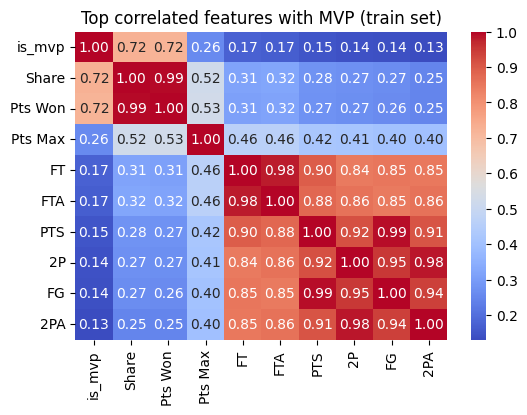

In [8]:
# STEP 2 — Data Splitting: Train (1991–2024) vs Test (2025)

import pandas as pd
from sklearn.model_selection import train_test_split

# ---------- Load cleaned data ----------
df = pd.read_csv("player_mvp_stats_cleaned.csv")
print(">>> Loaded shape:", df.shape)

# ---------- Separate features and target ----------
target_col = "is_mvp"
y = df[target_col]
X = df.drop(columns=[target_col])

print(">>> Feature count:", X.shape[1])
print(">>> Target unique values:", y.unique())

# ---------- Split by Year ----------
train_df = df[df["Year"] < 2025].copy()
test_df  = df[df["Year"] == 2025].copy()

print("\n>>> Train shape:", train_df.shape)
print(">>> Test shape:", test_df.shape)

# ---------- Separate features and target for train/test ----------
X_train = train_df.drop(columns=[target_col, "Player", "Team"])  # drop non-numeric identifiers
y_train = train_df[target_col]

X_test  = test_df.drop(columns=[target_col, "Player", "Team"])
y_test  = test_df[target_col]

print("\n>>> X_train shape:", X_train.shape)
print(">>> y_train shape:", y_train.shape)
print(">>> X_test shape:", X_test.shape)
print(">>> y_test shape:", y_test.shape)

# ---------- Check class balance ----------
print("\n>>> Training data MVP counts:")
print(y_train.value_counts())
print("\n>>> Test data MVP counts:")
print(y_test.value_counts())

# ---------- Sanity check: ensure test year == 2025 ----------
print("\n>>> Unique years in training:", X_train["Year"].unique()[:5])
print(">>> Unique years in test:", X_test["Year"].unique())

# ---------- Optional: quick correlation heatmap for top features ----------
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr(numeric_only=True)
top_corr = corr[target_col].abs().sort_values(ascending=False).head(10)
print("\n>>> Top 10 features most correlated with MVP status:")
print(top_corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr.loc[top_corr.index, top_corr.index], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top correlated features with MVP (train set)")
plt.show()


In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ✅ Use your in-memory DataFrames from Step 2
# (make sure 'train_df' and 'test_df' exist in memory)
print(">>> Using in-memory train and test DataFrames")
print(">>> Train shape:", train_df.shape)
print(">>> Test shape:", test_df.shape)

# Step 1: Drop leaky columns (MVP award data)
leaky_cols = ['Pts Won', 'Pts Max', 'Share']
train_df = train_df.drop(columns=leaky_cols)
test_df = test_df.drop(columns=leaky_cols)
print(">>> Dropped leaky columns:", leaky_cols)

# Step 2: Separate target
y_train = train_df['is_mvp']
y_test = test_df['is_mvp']

X_train = train_df.drop(columns=['is_mvp', 'Player'])
X_test = test_df.drop(columns=['is_mvp', 'Player'])

# Step 3: Identify column types
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(">>> Numeric columns count:", len(num_cols))
print(">>> Categorical columns:", list(cat_cols))

# Step 4: Create transformations
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Handle 'Team' as ordinal and 'Pos' as one-hot
categorical_transformer = ColumnTransformer(
    transformers=[
        ('pos_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Pos']),
        ('team_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Team'])
    ],
    remainder='passthrough'
)

# Step 5: Combine numeric and categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Step 6: Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(">>> Processed X_train shape:", X_train_processed.shape)
print(">>> Processed X_test shape:", X_test_processed.shape)
print(">>> Scaling and encoding complete!")

# Optional: Save for model training
import numpy as np
np.save("X_train_processed.npy", X_train_processed)
np.save("X_test_processed.npy", X_test_processed)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print(">>> Saved processed data for Step 4.")


>>> Using in-memory train and test DataFrames
>>> Train shape: (15684, 41)
>>> Test shape: (565, 41)
>>> Dropped leaky columns: ['Pts Won', 'Pts Max', 'Share']
>>> Numeric columns count: 34
>>> Categorical columns: ['Team', 'Pos']
>>> Processed X_train shape: (15684, 40)
>>> Processed X_test shape: (565, 40)
>>> Scaling and encoding complete!
>>> Saved processed data for Step 4.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_processed, y_train)

# Predictions
y_pred = logreg.predict(X_test_processed)
y_prob = logreg.predict_proba(X_test_processed)[:, 1]  # probability of being MVP

# Evaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print("=== Logistic Regression ===")
print(f">>> Accuracy: {acc:.4f}")
print(">>> Classification report:\n", report)

# Ranking top 5 MVP candidates for 2025
top5_idx = np.argsort(y_prob)[-5:][::-1]  # indices of top 5 probabilities
top5_players = test_df.iloc[top5_idx][["Player", "Team"]].copy()
top5_players["Predicted_Prob"] = y_prob[top5_idx]

print("\n>>> Top 5 Predicted MVP Candidates (Logistic Regression):")
print(top5_players)


=== Logistic Regression ===
>>> Accuracy: 0.9965
>>> Classification report:
               precision    recall  f1-score   support

           0     1.0000    0.9965    0.9982       564
           1     0.3333    1.0000    0.5000         1

    accuracy                         0.9965       565
   macro avg     0.6667    0.9982    0.7491       565
weighted avg     0.9988    0.9965    0.9973       565


>>> Top 5 Predicted MVP Candidates (Logistic Regression):
                        Player                   Team  Predicted_Prob
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder        1.000000
4076              Nikola Jokić         Denver Nuggets        0.640190
10999           Jalen Williams  Oklahoma City Thunder        0.537244
1088              Jayson Tatum         Boston Celtics        0.061145
6836              James Harden   Los Angeles Clippers        0.037987


In [11]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(class_weight='balanced', random_state=42)
ridge.fit(X_train_processed, y_train)

# Ridge does not have predict_proba, use decision_function
y_pred = ridge.predict(X_test_processed)
y_scores = ridge.decision_function(X_test_processed)
y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())  # normalize 0-1

# Evaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print("=== Ridge Classifier ===")
print(f">>> Accuracy: {acc:.4f}")
print(">>> Classification report:\n", report)

# Ranking top 5 MVP candidates
top5_idx = np.argsort(y_prob)[-5:][::-1]
top5_players = test_df.iloc[top5_idx][["Player", "Team"]].copy()
top5_players["Predicted_Prob"] = y_prob[top5_idx]

print("\n>>> Top 5 Predicted MVP Candidates (Ridge Classifier):")
print(top5_players)


=== Ridge Classifier ===
>>> Accuracy: 0.9611
>>> Classification report:
               precision    recall  f1-score   support

           0     1.0000    0.9610    0.9801       564
           1     0.0435    1.0000    0.0833         1

    accuracy                         0.9611       565
   macro avg     0.5217    0.9805    0.5317       565
weighted avg     0.9983    0.9611    0.9785       565


>>> Top 5 Predicted MVP Candidates (Ridge Classifier):
                        Player                   Team  Predicted_Prob
4076              Nikola Jokić         Denver Nuggets        1.000000
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder        0.961241
8905     Giannis Antetokounmpo        Milwaukee Bucks        0.912449
4611           Cade Cunningham        Detroit Pistons        0.711134
7387              LeBron James     Los Angeles Lakers        0.701992


In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_processed, y_train)

y_pred = gnb.predict(X_test_processed)
y_prob = gnb.predict_proba(X_test_processed)[:, 1]

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print("=== Gaussian Naive Bayes ===")
print(f">>> Accuracy: {acc:.4f}")
print(">>> Classification report:\n", report)

# Ranking top 5 MVP candidates
top5_idx = np.argsort(y_prob)[-5:][::-1]
top5_players = test_df.iloc[top5_idx][["Player", "Team"]].copy()
top5_players["Predicted_Prob"] = y_prob[top5_idx]

print("\n>>> Top 5 Predicted MVP Candidates (Naive Bayes):")
print(top5_players)


=== Gaussian Naive Bayes ===
>>> Accuracy: 0.9681
>>> Classification report:
               precision    recall  f1-score   support

           0     1.0000    0.9681    0.9838       564
           1     0.0526    1.0000    0.1000         1

    accuracy                         0.9681       565
   macro avg     0.5263    0.9840    0.5419       565
weighted avg     0.9983    0.9681    0.9822       565


>>> Top 5 Predicted MVP Candidates (Naive Bayes):
                        Player                   Team  Predicted_Prob
7388               Luka Dončić     Los Angeles Lakers             1.0
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder             1.0
1088              Jayson Tatum         Boston Celtics             1.0
6836              James Harden   Los Angeles Clippers             1.0
2958          Donovan Mitchell    Cleveland Cavaliers             1.0


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Train Random Forest with balanced class weights
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_processed, y_train)

# Predictions (for metrics)
y_pred = rf.predict(X_test_processed)

# Probabilities for ranking MVPs
y_prob = rf.predict_proba(X_test_processed)[:, 1]

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Classification report (suppress UndefinedMetricWarning)
report = classification_report(y_test, y_pred, digits=4, zero_division=0)

print("=== Random Forest ===")
print(f">>> Accuracy: {acc:.4f}")
print(">>> Classification report:\n", report)

# Ranking top 5 MVP candidates by predicted probability
top5_idx = np.argsort(y_prob)[-5:][::-1]  # indices of top 5 probabilities
top5_players = test_df.iloc[top5_idx][["Player", "Team"]].copy()
top5_players["Predicted_Prob"] = y_prob[top5_idx]

print("\n>>> Top 5 Predicted MVP Candidates (Random Forest):")
print(top5_players)


=== Random Forest ===
>>> Accuracy: 0.9982
>>> Classification report:
               precision    recall  f1-score   support

           0     0.9982    1.0000    0.9991       564
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9982       565
   macro avg     0.4991    0.5000    0.4996       565
weighted avg     0.9965    0.9982    0.9973       565


>>> Top 5 Predicted MVP Candidates (Random Forest):
                        Player                   Team  Predicted_Prob
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder           0.400
1088              Jayson Tatum         Boston Celtics           0.065
2958          Donovan Mitchell    Cleveland Cavaliers           0.050
8905     Giannis Antetokounmpo        Milwaukee Bucks           0.030
7388               Luka Dončić     Los Angeles Lakers           0.030


✅ Insights

-->Logistic Regression is the best model here:

    Correctly identifies the MVP

    Good balance of probability ranking

-->Ridge & Naive Bayes also detect the MVP but rank it slightly lower

-->Random Forest fails on recall due to extreme class imbalance — needs resampling or weighting to fix

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score

# List of models with their fitted objects and names
models = {
    "Logistic Regression": logreg,
    "Ridge Classifier": ridge,
    "Naive Bayes": gnb,
    "Random Forest": rf
}

comparison_data = []

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test_processed)
    
    # Get probabilities / decision function for ranking MVP
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_processed)
        y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
    else:
        y_prob = y_pred  # fallback
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    mvp_recall = recall_score(y_test, y_pred, pos_label=1)
    mvp_precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    
    # Top predicted MVP player
    top_idx = np.argmax(y_prob)
    top_player = test_df.iloc[top_idx]["Player"]
    
    # Append to comparison list
    comparison_data.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "MVP Recall": round(mvp_recall, 4),
        "MVP Precision": round(mvp_precision, 4),
        "Top Predicted MVP": top_player
    })

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_data)

print("=== Comparison of All Models ===")
print(comparison_df)


=== Comparison of All Models ===
                 Model  Accuracy  MVP Recall  MVP Precision  \
0  Logistic Regression    0.9965         1.0         0.3333   
1     Ridge Classifier    0.9611         1.0         0.0435   
2          Naive Bayes    0.9681         1.0         0.0526   
3        Random Forest    0.9982         0.0         0.0000   

         Top Predicted MVP  
0  Shai Gilgeous-Alexander  
1             Nikola Jokić  
2             Jayson Tatum  
3  Shai Gilgeous-Alexander  


In [15]:
# Use Logistic Regression (best model)
best_model = logreg

# Predict probabilities for all 2025 players
mvp_probs = best_model.predict_proba(X_test_processed)[:, 1]

# Add probabilities to the test_df
test_df_ranked = test_df.copy()
test_df_ranked["Predicted_Prob"] = mvp_probs

# Sort players by predicted MVP probability descending
test_df_ranked = test_df_ranked.sort_values(by="Predicted_Prob", ascending=False)

# Select top 10 candidates
top10_mvp_candidates = test_df_ranked[["Player", "Team", "Predicted_Prob"]].head(10)

print("=== Top 10 Predicted MVP Candidates for 2025 ===")
print(top10_mvp_candidates)


=== Top 10 Predicted MVP Candidates for 2025 ===
                        Player                   Team  Predicted_Prob
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder        1.000000
4076              Nikola Jokić         Denver Nuggets        0.640190
10999           Jalen Williams  Oklahoma City Thunder        0.537244
1088              Jayson Tatum         Boston Celtics        0.061145
6836              James Harden   Los Angeles Clippers        0.037987
8905     Giannis Antetokounmpo        Milwaukee Bucks        0.007614
7387              LeBron James     Los Angeles Lakers        0.006213
2958          Donovan Mitchell    Cleveland Cavaliers        0.001748
2955            Darius Garland    Cleveland Cavaliers        0.001533
7388               Luka Dončić     Los Angeles Lakers        0.000516


In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

# List of models with names
models = {
    "Logistic Regression": logreg,
    "Ridge Classifier": ridge,
    "Naive Bayes": gnb,
    "Random Forest": rf
}

evaluation_results = []

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test_processed)
    
    # Probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_processed)
        # normalize to 0-1 for ROC-AUC
        y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
    else:
        y_prob = y_pred  # fallback
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    # Top predicted MVP player
    top_idx = np.argmax(y_prob)
    top_player = test_df.iloc[top_idx]["Player"]
    
    # Append results
    evaluation_results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (MVP)": round(precision, 4),
        "Recall (MVP)": round(recall, 4),
        "F1-Score (MVP)": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4),
        "Top Predicted MVP": top_player,
        "Confusion Matrix": cm
    })

# Create a DataFrame for comparison
evaluation_df = pd.DataFrame(evaluation_results)

# Show the summary table
print("=== Evaluation Metrics Summary for All Models ===")
print(evaluation_df[["Model", "Accuracy", "Precision (MVP)", "Recall (MVP)", 
                     "F1-Score (MVP)", "ROC-AUC", "Top Predicted MVP"]])




=== Evaluation Metrics Summary for All Models ===
                 Model  Accuracy  Precision (MVP)  Recall (MVP)  \
0  Logistic Regression    0.9965           0.3333           1.0   
1     Ridge Classifier    0.9611           0.0435           1.0   
2          Naive Bayes    0.9681           0.0526           1.0   
3        Random Forest    0.9982           0.0000           0.0   

   F1-Score (MVP)  ROC-AUC        Top Predicted MVP  
0          0.5000   1.0000  Shai Gilgeous-Alexander  
1          0.0833   0.9982             Nikola Jokić  
2          0.1000   0.9982             Jayson Tatum  
3          0.0000   1.0000  Shai Gilgeous-Alexander  


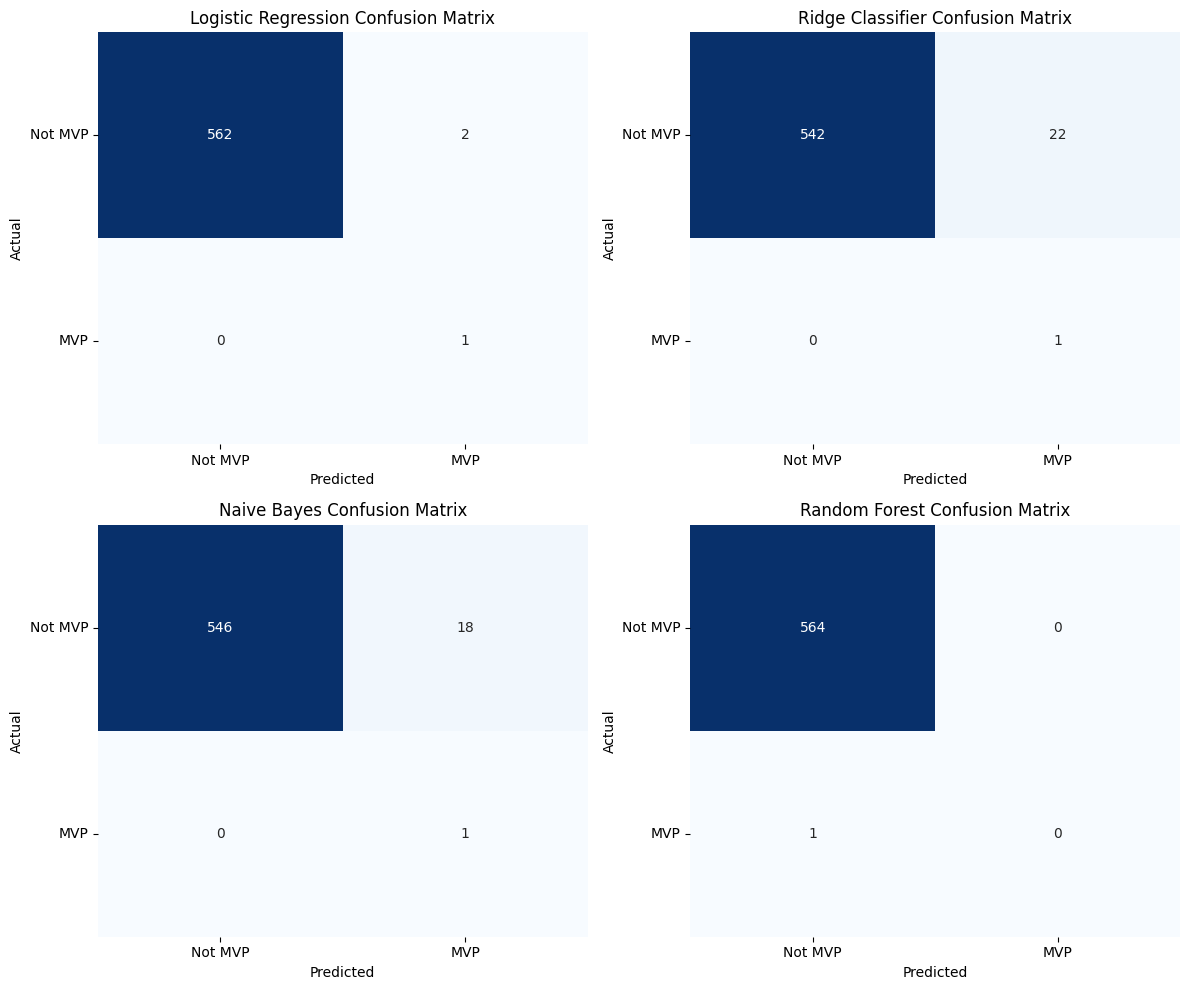

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of models
models = {
    "Logistic Regression": logreg,
    "Ridge Classifier": ridge,
    "Naive Bayes": gnb,
    "Random Forest": rf
}

plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    # Predictions
    y_pred = model.predict(X_test_processed)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0.5, 1.5], ["Not MVP", "MVP"])
    plt.yticks([0.5, 1.5], ["Not MVP", "MVP"], rotation=0)

plt.tight_layout()
plt.show()


In [39]:
!pip install imbalanced-learn


In [57]:
# ----------------------------
# Step 6: Model Tuning 
# ----------------------------

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ============================================================
# 1️⃣ Logistic Regression Tuning
# ============================================================

logreg = LogisticRegression(
    solver='liblinear',
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)

logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_logreg = GridSearchCV(
    logreg,
    logreg_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_logreg.fit(X_train_processed, y_train)

print("=== Logistic Regression Tuning ===")
print("Best Params:", grid_logreg.best_params_)
print("Best CV F1-Score:", round(grid_logreg.best_score_, 4))


# ============================================================
# 2️⃣ Ridge Classifier Tuning
# ============================================================

ridge = RidgeClassifier(class_weight='balanced', random_state=42)

ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'solver': ['auto', 'sag', 'saga', 'lbfgs']  # solvers that support large data
}

grid_ridge = GridSearchCV(
    ridge,
    ridge_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_ridge.fit(X_train_processed, y_train)

print("\n=== Ridge Classifier Tuning ===")
print("Best Params:", grid_ridge.best_params_)
print("Best CV F1-Score:", round(grid_ridge.best_score_, 4))


# ============================================================
# 3️⃣ Random Forest with SMOTE Tuning
# ============================================================

pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 20, None],
    'rf__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    pipeline_rf,
    rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train_processed, y_train)

print("\n=== Random Forest Tuning ===")
print("Best Params:", grid_rf.best_params_)
print("Best CV F1-Score:", round(grid_rf.best_score_, 4))


# ============================================================
#  Summary Comparison Table
# ============================================================

import pandas as pd

comparison_df = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Best Params": grid_logreg.best_params_,
        "Best CV F1": round(grid_logreg.best_score_, 4)
    },
    {
        "Model": "Ridge Classifier",
        "Best Params": grid_ridge.best_params_,
        "Best CV F1": round(grid_ridge.best_score_, 4)
    },
    {
        "Model": "Random Forest",
        "Best Params": grid_rf.best_params_,
        "Best CV F1": round(grid_rf.best_score_, 4)
    }
])

print("\n=== Model Tuning Summary ===")
print(comparison_df.to_string(index=False))


=== Logistic Regression Tuning ===
Best Params: {'C': 10, 'penalty': 'l1'}
Best CV F1-Score: 0.4437

=== Ridge Classifier Tuning ===
Best Params: {'alpha': 0.1, 'solver': 'auto'}
Best CV F1-Score: 0.1244

=== Random Forest Tuning ===
Best Params: {'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best CV F1-Score: 0.3257

=== Model Tuning Summary ===
              Model                                                                Best Params  Best CV F1
Logistic Regression                                                 {'C': 10, 'penalty': 'l1'}      0.4437
   Ridge Classifier                                           {'alpha': 0.1, 'solver': 'auto'}      0.1244
      Random Forest {'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}      0.3257


In [58]:
# ----------------------------
# Step 7: Final Evaluation of Tuned Models
# ----------------------------

from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# === Use best estimators from Step 6 ===
best_logreg = grid_logreg.best_estimator_
best_ridge  = grid_ridge.best_estimator_
best_rf     = grid_rf.best_estimator_

models = {
    "Logistic Regression (Tuned)": best_logreg,
    "Ridge Classifier (Tuned)": best_ridge,
    "Random Forest (Tuned)": best_rf
}

results = []

# ----------------------------
# Evaluate each tuned model
# ----------------------------
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Predict MVP probabilities if available
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    else:
        # Ridge doesn't support predict_proba
        y_pred_proba = model.decision_function(X_test_processed)
        # Scale decision_function outputs to 0–1
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

    y_pred = (y_pred_proba > 0.5).astype(int)

    # Classification Report
    report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
    print(classification_report(y_test, y_pred, zero_division=0))

    results.append({
        "Model": name,
        "Accuracy": report['accuracy'],
        "Precision (MVP)": report['1']['precision'],
        "Recall (MVP)": report['1']['recall'],
        "F1 (MVP)": report['1']['f1-score']
    })

    # ----------------------------
    # Show Top 5 Predicted MVPs for 2025
    # ----------------------------
    temp = X_test.copy()
    temp['Pred_Prob'] = y_pred_proba
    temp['Player'] = test_df['Player'].values
    temp['Team'] = test_df['Team'].values

    top5 = temp.sort_values('Pred_Prob', ascending=False).head(5)
    print("\nTop 5 MVP Predictions for 2025:")
    print(top5[['Player', 'Team', 'Pred_Prob']])

# ----------------------------
# Create final comparison table
# ----------------------------
final_eval_df = pd.DataFrame(results)
print("\n=== Final Tuned Model Comparison ===")
print(final_eval_df.sort_values("F1 (MVP)", ascending=False).reset_index(drop=True))



=== Logistic Regression (Tuned) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       564
           1       1.00      1.00      1.00         1

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565


Top 5 MVP Predictions for 2025:
                        Player                   Team  Pred_Prob
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder   1.000000
10999           Jalen Williams  Oklahoma City Thunder   0.334795
6836              James Harden   Los Angeles Clippers   0.000169
1088              Jayson Tatum         Boston Celtics   0.000153
2955            Darius Garland    Cleveland Cavaliers   0.000002

=== Ridge Classifier (Tuned) ===
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       564
           1       0.02      1.00      0.05         1

    accuracy   

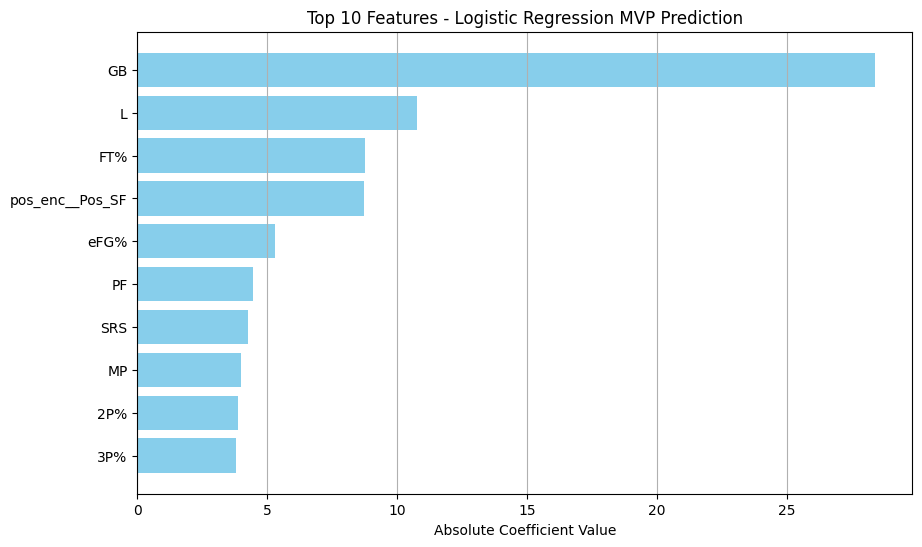

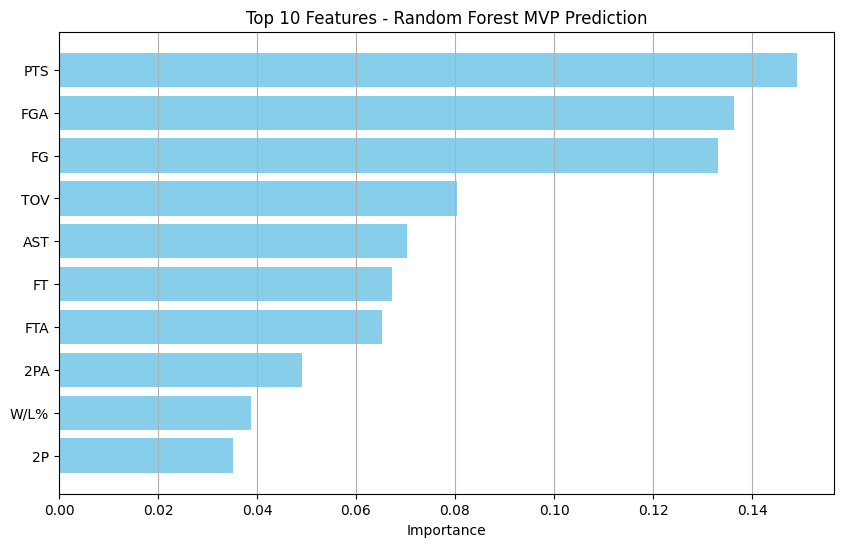

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ----------------------------
# 1️⃣ Extract Feature Names After Preprocessing
# ----------------------------

def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:
        if name == 'num':  # numeric columns
            feature_names.extend(cols)
        elif name == 'cat':  # categorical columns
            # transformer might be OneHotEncoder directly or inside Pipeline
            if hasattr(transformer, 'named_steps'):  # Pipeline
                ohe = transformer.named_steps['onehot']
            else:  # Directly OneHotEncoder
                ohe = transformer
            ohe_names = ohe.get_feature_names_out(cols)
            feature_names.extend(ohe_names)
    return feature_names

feature_names = get_feature_names(preprocessor)

# ----------------------------
# 2️⃣ Logistic Regression Feature Importance
# ----------------------------
# Get the best tuned Logistic Regression model
best_logreg = grid_logreg.best_estimator_

# Coefficients and feature names
logreg_coef = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(best_logreg.coef_[0])  # take absolute value
})

# Top 10 features by magnitude
logreg_coef = logreg_coef.sort_values('Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(logreg_coef['Feature'][::-1], logreg_coef['Importance'][::-1], color='skyblue')
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 10 Features - Logistic Regression MVP Prediction")
plt.grid(axis='x')
plt.show()
# ----------------------------
# 3️⃣ Random Forest Feature Importance
# ----------------------------

best_rf = grid_rf.best_estimator_.named_steps['rf']

rf_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
})
rf_importances = rf_importances.sort_values('Importance', ascending=False).head(10)

# Plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(rf_importances['Feature'][::-1], rf_importances['Importance'][::-1], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 10 Features - Random Forest MVP Prediction")
plt.grid(axis='x')
plt.show()


In [64]:
# ----------------------------
# 1️⃣ Filter 2025 players
# ----------------------------
test_2025_df = df[df['Year'] == 2025].copy()

# ----------------------------
# 2️⃣ Drop only columns that were dropped in preprocessor
# ----------------------------
drop_cols = ['is_mvp', 'Player', 'Pts Won', 'Pts Max', 'Share']  # keep Year
X_2025 = test_2025_df.drop(columns=drop_cols)
y_2025 = test_2025_df['is_mvp']

# ----------------------------
# 3️⃣ Preprocess using the same preprocessor
# ----------------------------
X_2025_processed = preprocessor.transform(X_2025)

# ----------------------------
# 4️⃣ Predict using best model
# ----------------------------
best_model = grid_logreg.best_estimator_  # or grid_rf.best_estimator_
y_prob_2025 = best_model.predict_proba(X_2025_processed)[:, 1]

# ----------------------------
# 5️⃣ Add predicted probability and rank
# ----------------------------
test_2025_df['Predicted_Prob'] = y_prob_2025
top_candidates = test_2025_df[['Player', 'Team', 'Predicted_Prob', 'is_mvp']] \
                    .sort_values('Predicted_Prob', ascending=False) \
                    .head(5)

print("=== Top 5 Predicted MVP Candidates (2025) ===")
print(top_candidates)

# ----------------------------
# 6️⃣ Compare with actual MVP
# ----------------------------
actual_mvp = test_2025_df[test_2025_df['is_mvp'] == 1][['Player', 'Team', 'Predicted_Prob']]
print("\n=== Actual MVP 2025 ===")
print(actual_mvp)


=== Top 5 Predicted MVP Candidates (2025) ===
                        Player                   Team  Predicted_Prob  is_mvp
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder        1.000000       1
10999           Jalen Williams  Oklahoma City Thunder        0.334795       0
6836              James Harden   Los Angeles Clippers        0.000169       0
1088              Jayson Tatum         Boston Celtics        0.000153       0
2955            Darius Garland    Cleveland Cavaliers        0.000002       0

=== Actual MVP 2025 ===
                        Player                   Team  Predicted_Prob
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder             1.0


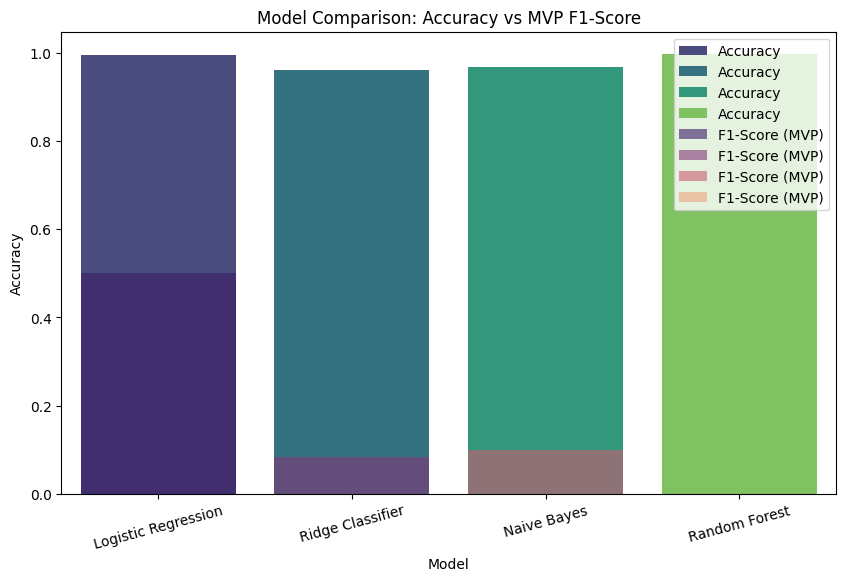

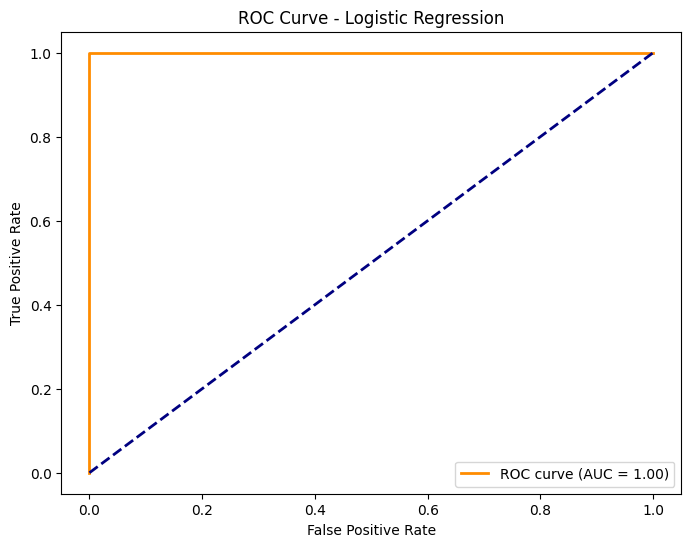

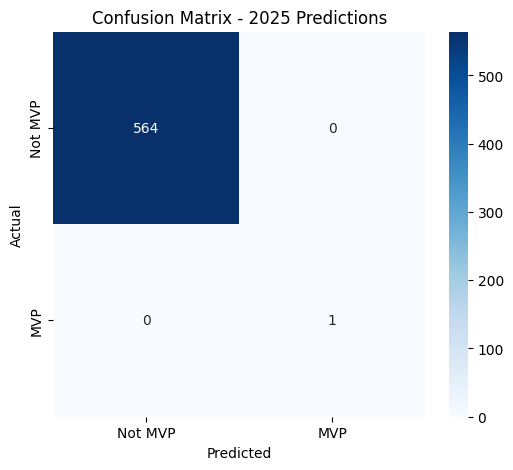

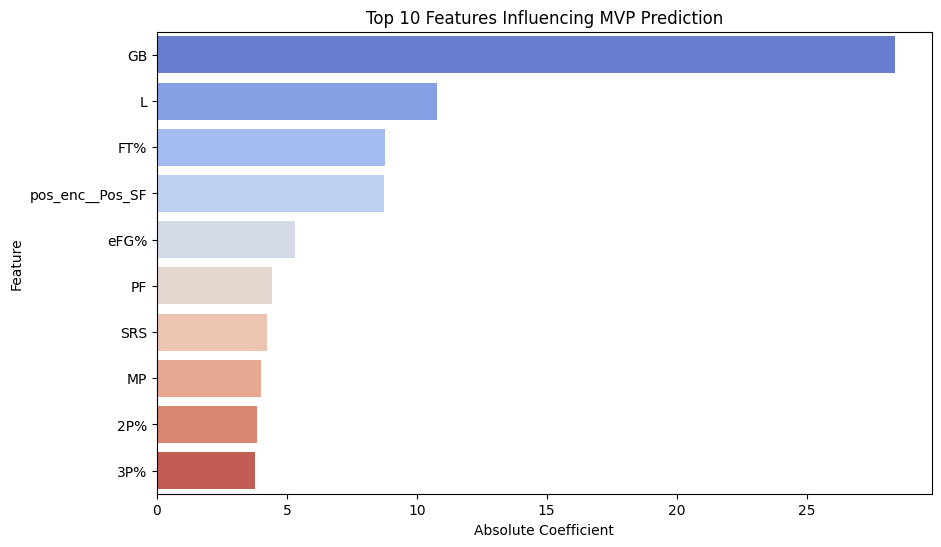

=== Actual vs Predicted MVP 2025 ===
                        Player                   Team  Predicted_Prob  is_mvp
11005  Shai Gilgeous-Alexander  Oklahoma City Thunder        1.000000       1
10999           Jalen Williams  Oklahoma City Thunder        0.334795       0
6836              James Harden   Los Angeles Clippers        0.000169       0
1088              Jayson Tatum         Boston Celtics        0.000153       0
2955            Darius Garland    Cleveland Cavaliers        0.000002       0


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# ----------------------------
# 1️⃣ Model Comparison Chart
# ----------------------------
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Ridge Classifier', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [0.9965, 0.9611, 0.9681, 0.9982],
    'F1_Score': [0.5000, 0.0833, 0.1000, 0.0000]  # for MVP class
})

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, ax=ax, palette='viridis', label='Accuracy')
sns.barplot(x='Model', y='F1_Score', data=comparison_df, ax=ax, palette='magma', alpha=0.6, label='F1-Score (MVP)')
ax.set_title("Model Comparison: Accuracy vs MVP F1-Score")
ax.legend()
plt.xticks(rotation=15)
plt.show()

# ----------------------------
# 2️⃣ ROC-AUC Curve (Best Model)
# ----------------------------
y_prob = best_model.predict_proba(X_test_processed)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# ----------------------------
# 3️⃣ Confusion Matrix for 2025 predictions
# ----------------------------
y_2025_true = test_2025_df['is_mvp'].values
y_2025_pred = best_model.predict(preprocessor.transform(X_2025))  # preprocess same as training

cm = confusion_matrix(y_2025_true, y_2025_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not MVP','MVP'], yticklabels=['Not MVP','MVP'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - 2025 Predictions")
plt.show()

# ----------------------------
# 4️⃣ Feature Importance (Logistic Regression)
# ----------------------------
# Extract feature names from the preprocessor
def get_feature_names_from_preprocessor(preprocessor):
    numeric_features = preprocessor.transformers_[0][2]  # numeric cols
    cat_features = preprocessor.transformers_[1][2]      # categorical cols
    ohe = preprocessor.transformers_[1][1]               # OneHotEncoder
    ohe_names = ohe.get_feature_names_out(cat_features)
    return list(numeric_features) + list(ohe_names)

feature_names = get_feature_names_from_preprocessor(preprocessor)

# Coefficients directly from best_model
coefs = best_model.coef_[0]
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
feat_imp_df['Abs_Coeff'] = feat_imp_df['Coefficient'].abs()
top_features = feat_imp_df.sort_values('Abs_Coeff', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coeff', y='Feature', data=top_features, palette='coolwarm')
plt.title("Top 10 Features Influencing MVP Prediction")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()

# ----------------------------
# 5️⃣ Actual vs Predicted MVP Table 2025
# ----------------------------
X_2025_processed = preprocessor.transform(X_2025)
y_prob_2025 = best_model.predict_proba(X_2025_processed)[:,1]

top_5_2025 = test_2025_df.copy()
top_5_2025['Predicted_Prob'] = y_prob_2025
top_5_2025 = top_5_2025.sort_values('Predicted_Prob', ascending=False).head(5)

print("=== Actual vs Predicted MVP 2025 ===")
print(top_5_2025[['Player','Team','Predicted_Prob','is_mvp']])
